In [1]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
import json
import pandas as pd

In [2]:
with open('x_vector.json', 'r') as file:
    x_vector = json.load(file)

with open('y_vector.json', 'r') as file:
    y_vector = json.load(file)


filtered_indices = [
    i for i, sublist in enumerate(x_vector) 
    if not any(
        (isinstance(value, (float, int)) and (np.isinf(value) or np.abs(value) > np.finfo(np.float32).max or np.isnan(value) or value == 'nan'))
        for value in sublist
    )
]

x_vector_filtered = [x_vector[i] for i in filtered_indices]
y_vector_filtered = [y_vector[i] for i in filtered_indices]


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_vector_filtered, y_vector_filtered, test_size=0.20, random_state=42)

In [4]:
cat_clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    verbose=100,       # Set to >0 (e.g., verbose=10) for progress
    random_state=42
)

cat_clf.fit(x_train, y_train)

y_pred = cat_clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0:	learn: 0.6715849	total: 112ms	remaining: 11.1s
99:	learn: 0.4285590	total: 2.56s	remaining: 0us
Test Accuracy: 0.7520325203252033

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       164
           1       0.65      0.56      0.60        82

    accuracy                           0.75       246
   macro avg       0.72      0.70      0.71       246
weighted avg       0.75      0.75      0.75       246

Confusion Matrix:
[[139  25]
 [ 36  46]]


/home/andy1220/anaconda3/envs/feature_extraction/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


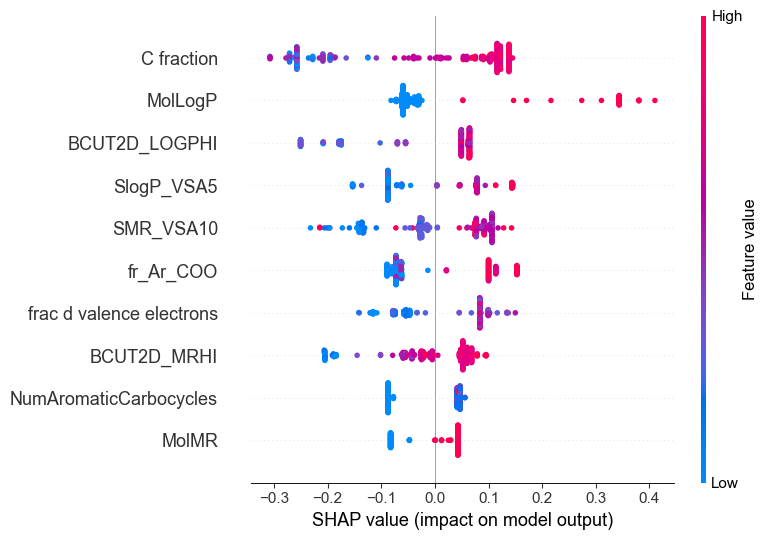

In [5]:
import shap

import matplotlib.pyplot as plt
import pandas as pd


x_test = pd.DataFrame(x_test)


mm = 0.0393701

title = 8
plt.rcParams['figure.figsize'] = (45 * mm, 45 * mm)
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 10

plt.rcParams['axes.grid'] = False
plt.rcParams['axes.edgecolor'] = "black"
plt.rcParams['axes.facecolor'] = "white"
plt.rcParams['axes.linewidth'] = 0.65

plt.rcParams['lines.linewidth'] = 0.65
plt.rcParams['lines.color'] = 'black'

explainer = shap.TreeExplainer(cat_clf)
shap_values = explainer.shap_values(x_test)

if len(shap_values) == 2:
    shap_values = shap_values[1]  


shap.summary_plot(
    shap_values, 
    x_test, 
    plot_type='dot',
    max_display=10,
    show=False
)

plt.show()
